Example derived from: https://jckantor.github.io/CBE30338/03.05-One-Compartment-Pharmacokinetics.html

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

PK data from:
https://pubmed.ncbi.nlm.nih.gov/33428169/

In [59]:
class Levetiracetam():
    F  = 0.96 # percent
    Vd = 0.70 # L/kg
    CL = 57.6 # ml/hour/kg

    @property
    def Q(self,ABW=80):
        return (self.CL*ABW)/1000
    
    @property
    def t_half(self,ABW=80):
        return 0.693*self.V/self.Q

In [50]:
ABW = 80       # kg
F = 0.96       # percent (bioavailability)
# F = 0.8
Vd = 0.7       # L/kg
V = Vd*ABW      # liters
CL = 57.6      # mL/hour/kg
Q = (CL*ABW)/1000        # liters/hour
t_half = 6.8   # hours
# MIC = 5        # mg/liter
# MBC = 8        # mg/liter

Cinitial = 16  # mg/liter
print('Volume distribution: ',V)
print('Clearance: ', Q, 'L/hr')
print('thalf', 0.693*V/Q, 'hr-1')

Volume distribution:  56.0
Clearance:  4.608 L/hr
thalf 8.421875 hr-1


AED Dosage guidelines: https://www.cms.gov/Medicare-Medicaid-Coordination/Fraud-Prevention/Medicaid-Integrity-Education/Pharmacy-Education-Materials/Downloads/ac-adult-dosingchart11-14.pdf

In [67]:
# parameter values
td = 1.5
tdose = 24
# dt = 1.0           # Peak plasma time
Udose = 2000       # mg

# function defintion
def u(t):
    if t % tdose <= dt:
        return Udose*F/dt
    else:
        return 0

A simple pharmacokinetic model has the same form as a model for the dilution of a chemical species in a constant volume stirred-tank mixer. For a stirred-tank reactor with constant volume $V$, volumetric outlet flowrate $Q$, and inlet mass flow $u(t)$,

$$ \frac{dC}{dt} = \frac{1}{V}u(t) - \frac{Q}{V}C $$

where $C$ is concentration in units of mass per unit volume. $V$ is blood plasma volume or volume of distribution, $Q$ is the total body clearance rate

In [68]:
def deriv(C,t):
    return u(t)/V - (Q/V)*C

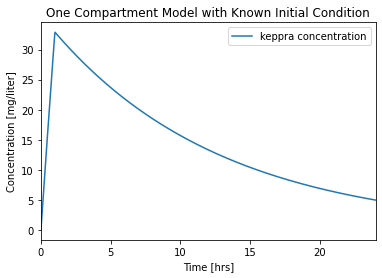

In [63]:
t = np.linspace(0,24,1000)
C = odeint(deriv, Cinitial, t)

def plotConcentration(t,C):
    plt.plot(t,C)
    plt.xlim(0,max(t))
    plt.legend(['keppra concentration'])
    plt.xlabel('Time [hrs]')
    plt.ylabel('Concentration [mg/liter]')
    plt.title('One Compartment Model with Known Initial Condition');
    
plotConcentration(t,C)

Text(0.5, 1.0, 'Dosing function u(t) for of total dose 2000 mg')

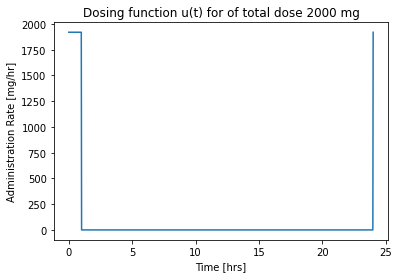

In [64]:
# visualization
t = np.linspace(0,24,1000)    # create a list of time steps
y = [u(tau) for tau in t]         # list comprehension
plt.plot(t,y)
plt.xlabel('Time [hrs]')
plt.ylabel('Administration Rate [mg/hr]')
plt.title('Dosing function u(t) for of total dose {0} mg'.format(Udose))

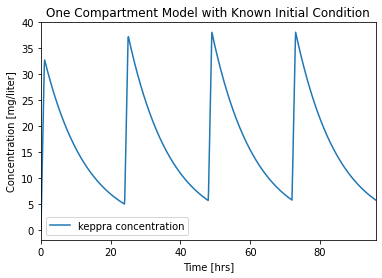

In [66]:
Cinitial = 0
t = np.linspace(0,96,1000)
C = odeint(deriv, Cinitial, t, tcrit=t)

plotConcentration(t,C)